# Neural Network Classification – California Housing Dataset

This notebook:
- Trains a neural network for 3-class classification
- Uses validation set for monitoring and early stopping
- Evaluates performance on the test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [4]:
low_thresh = y_train.quantile(0.33)
high_thresh = y_train.quantile(0.66)

def classify(value):
    if value <= low_thresh:
        return 0
    elif value <= high_thresh:
        return 1
    else:
        return 2

y_train_cls = y_train.apply(classify)
y_val_cls   = y_val.apply(classify)
y_test_cls  = y_test.apply(classify)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [7]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [10]:
history = model.fit(
    X_train_scaled, y_train_cls,
    validation_data=(X_val_scaled, y_val_cls),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6600 - loss: 0.7541 - val_accuracy: 0.7096 - val_loss: 0.6500
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7249 - loss: 0.6306 - val_accuracy: 0.7248 - val_loss: 0.6178
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7368 - loss: 0.6043 - val_accuracy: 0.7271 - val_loss: 0.6001
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7433 - loss: 0.5926 - val_accuracy: 0.7316 - val_loss: 0.5965
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7509 - loss: 0.5801 - val_accuracy: 0.7364 - val_loss: 0.5897
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7544 - loss: 0.5712 - val_accuracy: 0.7290 - val_loss: 0.5879
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7562 - loss: 0.5655 - val_accuracy: 0.7422 - val_loss: 0.5755
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7593 - loss: 0.5600 - val_accu

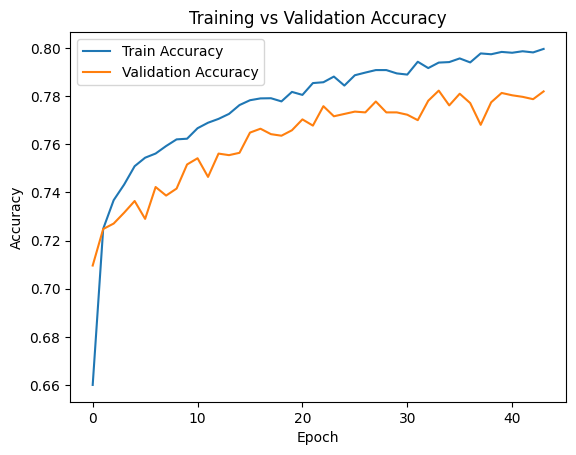

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

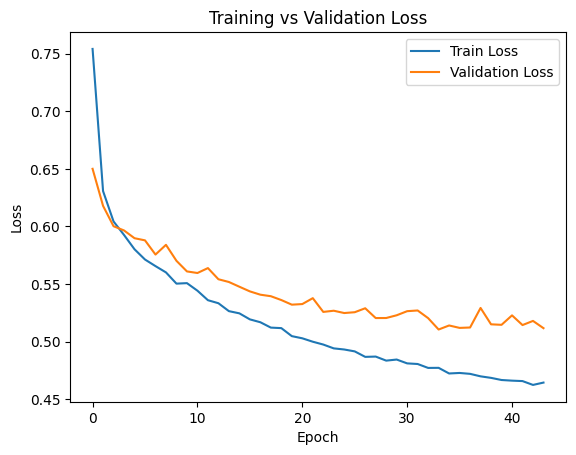

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cls)

print("Final Test Accuracy:", test_acc)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4849
Final Test Accuracy: 0.7919896841049194


In [15]:
model.save("../models/neural_network_model.keras")
print("Model saved successfully")

Model saved successfully
